# Optimizing Marketing Budget Efficiency in the Bicycle Industry Using RFM Analysis

In the bicycle industry, an effective marketing strategy is not only determined by the size of the budget spent but also by how efficiently and precisely the funds are allocated. One of the main challenges for companies is distributing the marketing budget to customers with long-term profit potential while avoiding waste on segments that are less responsive to promotions. Therefore, a data-driven approach is necessary to optimize marketing strategies for greater efficiency and maximum impact.

## RFM Analysis: A Data-Driven Approach

One analytical method that can be utilized is Recency, Frequency, Monetary (RFM) Analysis. RFM Analysis enables companies to segment customers based on:

- Recency (R) — How recently a customer made their last transaction.
- Frequency (F) — How often a customer makes transactions within a given period.
- Monetary (M) — How much money the customer has spent.

Using this method, companies can:

- Identify loyal customers who deserve loyalty programs or special incentives.
- Recognize customers becoming inactive and implement more targeted re-engagement strategies.
- Exclude low-value, low-frequency customers from expensive marketing campaigns, ensuring the budget is focused on more profitable segments.

## Maximizing Marketing Impact and ROI

This analysis aims to optimize marketing budget efficiency in the bicycle industry through the implementation of RFM Analysis. By gaining a more accurate understanding of customer spending patterns, companies can:

- Minimize budget waste.
- Enhance marketing campaign effectiveness**.
- Maximize Return on Investment (ROI).

Through a data-driven approach, marketing strategies can be developed in a more targeted and sustainable manner, ultimately improving a company’s competitiveness in the bicycle industry.


In [80]:
import pandas as pd
import numpy as np

df = pd.read_csv('Bycycle Transaction.csv')

# Exploratory Data Analysis (EDA) on the Bicycle Transaction Dataset

## Data Understanding

1. Getting dataset information
2. Checking the first few rows
3. Checking missing values and dropping them
4. Checking duplicates

In [81]:
# Getting dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20000 non-null  int64  
 1   transaction_id           20000 non-null  int64  
 2   product_id               20000 non-null  int64  
 3   CustomerID               20000 non-null  int64  
 4   transaction_date         20000 non-null  object 
 5   online_order             19640 non-null  object 
 6   order_status             20000 non-null  object 
 7   brand                    19803 non-null  object 
 8   product_line             19803 non-null  object 
 9   product_class            19803 non-null  object 
 10  product_size             19803 non-null  object 
 11  list_price               20000 non-null  float64
 12  standard_cost            19803 non-null  float64
 13  product_first_sold_date  19803 non-null  float64
 14  InvoiceDate           

In [82]:
# Converting data type

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['transaction_date'] = pd.to_datetime(df['transaction_date'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               20000 non-null  int64         
 1   transaction_id           20000 non-null  int64         
 2   product_id               20000 non-null  int64         
 3   CustomerID               20000 non-null  int64         
 4   transaction_date         20000 non-null  datetime64[ns]
 5   online_order             19640 non-null  object        
 6   order_status             20000 non-null  object        
 7   brand                    19803 non-null  object        
 8   product_line             19803 non-null  object        
 9   product_class            19803 non-null  object        
 10  product_size             19803 non-null  object        
 11  list_price               20000 non-null  float64       
 12  standard_cost            19803 n

After inspection, the dataset contains 14 columns with various data types, including integer, datetime, boolean, object, and float, as illustrated in this table:

| Code                     | Data Description                                       | Data Type  |
|--------------------------|-------------------------------------------------------|------------|
| transaction_id          | Unique ID for each transaction                        | Integer    |
| product_id             | Unique ID for each product                             | Integer    |
| CustomerID             | Unique customer ID                                     | Integer    |
| transaction_date       | Date when the transaction occurred                     | Datetime   |
| online_order           | Status of whether the transaction was made online (True/False) | Boolean    |
| order_status           | Transaction status (e.g., Approved, Cancelled)         | Object     |
| brand                  | Bicycle brand purchased                                | Object     |
| product_line           | Bicycle category (e.g., Standard)                      | Object     |
| product_class          | Product classification based on quality (Low, Medium, High) | Object     |
| product_size           | Bicycle size (e.g., Medium, Large)                     | Object     |
| list_price            | Selling price of the product                           | Float      |
| standard_cost          | Manufacturing or base cost of the product              | Float      |
| product_first_sold_date | Date when the product was first sold                   | Datetime   |
| InvoiceDate            | Date of the transaction invoice                        | Datetime   |


In [ ]:
# Checking the first few rows

df.head()

,Unnamed: 0,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01


In [84]:
# Filtering data for only approved transaction

df = df[df['order_status'] == 'Approved']

In [85]:
df.isna().sum() # checking missing values

Unnamed: 0                   0
transaction_id               0
product_id                   0
CustomerID                   0
transaction_date             0
online_order               354
order_status                 0
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
InvoiceDate                  0
dtype: int64

In [86]:
# Menghapus baris yang memiliki nilai NaN/menghapus missing values

df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.drop(columns=['Unnamed: 0'], inplace=True)

df

,transaction_id,product_id,CustomerID,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,InvoiceDate
0,1,2,2950,2017-02-25,False,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0,2017-02-25
1,2,3,3120,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0,2017-05-21
2,3,37,402,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0,2017-10-16
3,4,88,3135,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0,2017-08-31
4,5,78,787,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0,2017-10-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19268,19996,51,1018,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,37823.0,2017-06-24
19269,19997,41,127,2017-11-09,True,Approved,Solex,Road,medium,medium,416.98,312.74,35560.0,2017-11-09
19270,19998,87,2284,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,40410.0,2017-04-14
19271,19999,6,2764,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,38216.0,2017-07-03


In [87]:
# Checking duoplication

df.duplicated().sum()

np.int64(0)

## Preparing Dataset for Analysis

1. Extracting only numerical columns and summary statistics for them
2. Extracting only categorical columns and summary statistics for them

In [88]:
# Extracting only numerical columns

numerik = df.select_dtypes(include='number') # Those that include only integer dan float will be included
numerik

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
0,1,2,2950,71.49,53.62,41245.0
1,2,3,3120,2091.47,388.92,41701.0
2,3,37,402,1793.43,248.82,36361.0
3,4,88,3135,1198.46,381.10,36145.0
4,5,78,787,1765.30,709.48,42226.0
...,...,...,...,...,...,...
19268,19996,51,1018,2005.66,1203.40,37823.0
19269,19997,41,127,416.98,312.74,35560.0
19270,19998,87,2284,1636.90,44.71,40410.0
19271,19999,6,2764,227.88,136.73,38216.0


In [89]:
# Summary statistics for numerical columns

round(numerik.describe())

,transaction_id,product_id,CustomerID,list_price,standard_cost,product_first_sold_date
count,19273.0,19273.0,19273.0,19273.0,19273.0,19273.0
mean,9995.0,46.0,1740.0,1107.0,555.0,38203.0
std,5780.0,31.0,1012.0,583.0,406.0,2879.0
min,1.0,0.0,1.0,12.0,7.0,33259.0
25%,4978.0,18.0,857.0,575.0,215.0,35667.0
50%,9993.0,45.0,1740.0,1164.0,508.0,38216.0
75%,15006.0,72.0,2615.0,1635.0,795.0,40672.0
max,20000.0,100.0,5034.0,2091.0,1760.0,42710.0


In [90]:
# Extracting only categorical columns

categorical = df.select_dtypes(exclude ='number') # Those that include only string will be included
categorical

,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,InvoiceDate
0,2017-02-25,False,Approved,Solex,Standard,medium,medium,2017-02-25
1,2017-05-21,True,Approved,Trek Bicycles,Standard,medium,large,2017-05-21
2,2017-10-16,False,Approved,OHM Cycles,Standard,low,medium,2017-10-16
3,2017-08-31,False,Approved,Norco Bicycles,Standard,medium,medium,2017-08-31
4,2017-10-01,True,Approved,Giant Bicycles,Standard,medium,large,2017-10-01
...,...,...,...,...,...,...,...,...
19268,2017-06-24,True,Approved,OHM Cycles,Standard,high,medium,2017-06-24
19269,2017-11-09,True,Approved,Solex,Road,medium,medium,2017-11-09
19270,2017-04-14,True,Approved,OHM Cycles,Standard,medium,medium,2017-04-14
19271,2017-07-03,False,Approved,OHM Cycles,Standard,high,medium,2017-07-03


In [91]:
categorical.describe()

,transaction_date,InvoiceDate
count,19273,19273
mean,2017-07-01 14:31:47.123955712,2017-07-01 14:31:47.123955712
min,2017-01-01 00:00:00,2017-01-01 00:00:00
25%,2017-04-01 00:00:00,2017-04-01 00:00:00
50%,2017-07-03 00:00:00,2017-07-03 00:00:00
75%,2017-10-02 00:00:00,2017-10-02 00:00:00
max,2017-12-30 00:00:00,2017-12-30 00:00:00


In [92]:
# Computing the number of customers 

numerik[["CustomerID"]].nunique()

CustomerID    3490
dtype: int64

## Recency

In [93]:
# Finding the last date in the data (most recent date)

current_date = df['InvoiceDate'].max()

In [94]:
# Finding the last date in the data (last transaction) for each customer

last_transaction = df.groupby('CustomerID')['InvoiceDate'].max()
last_transaction

CustomerID
1      2017-12-23
2      2017-08-24
3      2017-09-19
4      2017-06-18
5      2017-12-14
          ...    
3497   2017-11-08
3498   2017-08-25
3499   2017-11-09
3500   2017-08-08
5034   2017-10-07
Name: InvoiceDate, Length: 3490, dtype: datetime64[ns]

In [95]:
current_date = pd.to_datetime("2017-12-30")


In [96]:
# mencari selisih antara tanggal terkini (current date) dan tanggal terakhir beli (last transaction)

recency = (current_date - last_transaction).dt.days
recency = recency.rename('Recency')
recency


CustomerID
1         7
2       128
3       102
4       195
5        16
       ... 
3497     52
3498    127
3499     51
3500    144
5034     84
Name: Recency, Length: 3490, dtype: int64

## Frequency

In [97]:
frequency = df.groupby('CustomerID')['transaction_id'].nunique().rename('Frequency')
frequency

CustomerID
1       11
2        3
3        7
4        2
5        6
        ..
3497     3
3498     6
3499     7
3500     6
5034     3
Name: Frequency, Length: 3490, dtype: int64

## Monetary

In [98]:
monetary = df.groupby('CustomerID')['list_price'].sum().rename('Monetary')
monetary

CustomerID
1       9084.45
2       4149.07
3       9525.22
4       1047.72
5       5903.20
         ...   
3497    3744.07
3498    5177.06
3499    7673.48
3500    4922.41
5034    1519.92
Name: Monetary, Length: 3490, dtype: float64

## Membuat DataFrame

In [99]:
rfm = pd.DataFrame({
    'Recency': recency,
    'Frequency': frequency,
    'Monetary': monetary
}).reset_index()
rfm

,CustomerID,Recency,Frequency,Monetary
0,1,7,11,9084.45
1,2,128,3,4149.07
2,3,102,7,9525.22
3,4,195,2,1047.72
4,5,16,6,5903.20
...,...,...,...,...
3485,3497,52,3,3744.07
3486,3498,127,6,5177.06
3487,3499,51,7,7673.48
3488,3500,144,6,4922.41


# Deskripsi Statistika RFM

In [100]:
round(rfm.describe(),2)

,CustomerID,Recency,Frequency,Monetary
count,3490.00,3490.00,3490.00,3490.00
mean,1750.09,62.85,5.52,6113.58
std,1011.35,59.37,2.28,2898.02
min,1.00,0.00,1.00,60.34
25%,876.25,18.00,4.00,4023.00
50%,1749.50,45.00,5.00,5829.05
75%,2622.75,88.00,7.00,7934.46
max,5034.00,353.00,14.00,19071.32


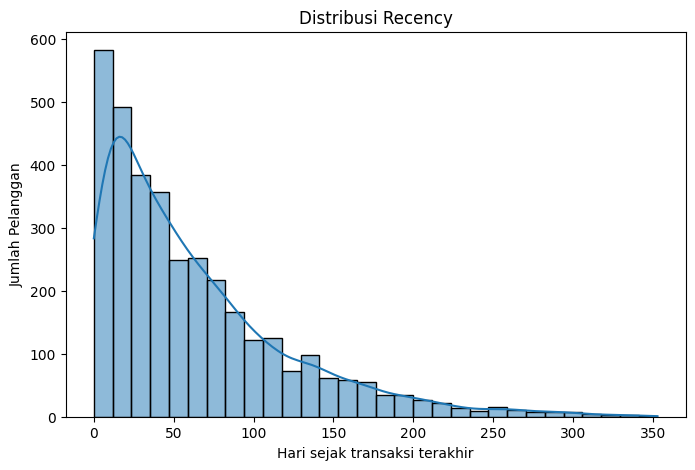

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram Recency
plt.figure(figsize=(8,5))
sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Distribusi Recency')
plt.xlabel('Hari sejak transaksi terakhir')
plt.ylabel('Jumlah Pelanggan')
plt.show()

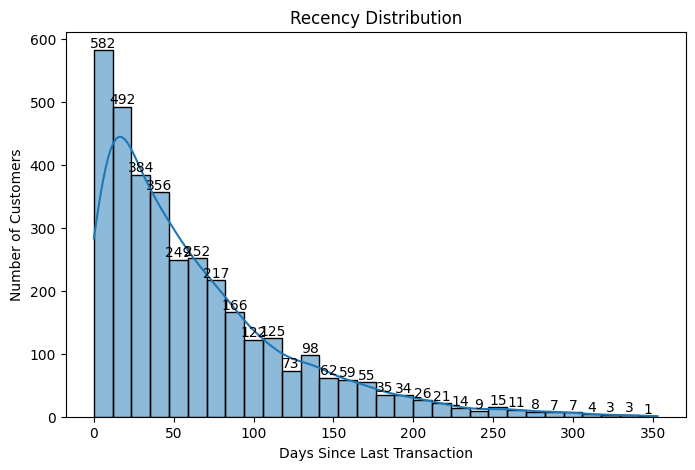

In [102]:
plt.figure(figsize=(8, 5))
ax = sns.histplot(rfm['Recency'], bins=30, kde=True)
plt.title('Recency Distribution')
plt.xlabel('Days Since Last Transaction')
plt.ylabel('Number of Customers')

# Adding labels to each histogram bar
for patch in ax.patches:
    height = patch.get_height()
    if height > 0:  # Only display labels if the bar height is greater than 0
        plt.text(patch.get_x() + patch.get_width() / 2,
                 height,
                 f'{int(height)}',
                 ha='center', va='bottom', fontsize=10)

plt.show()



Text(0.5, 1.0, 'Frequency Distribution')

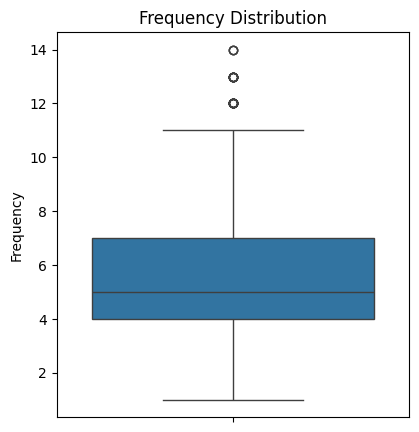

In [103]:
# Boxplot Frequency & Monetary
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=rfm['Frequency'])
plt.title('Frequency Distribution')

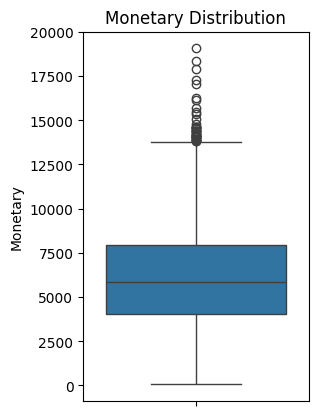

In [104]:
plt.subplot(1, 2, 2)
sns.boxplot(y=rfm['Monetary'])
plt.title('Monetary Distribution')
plt.show()

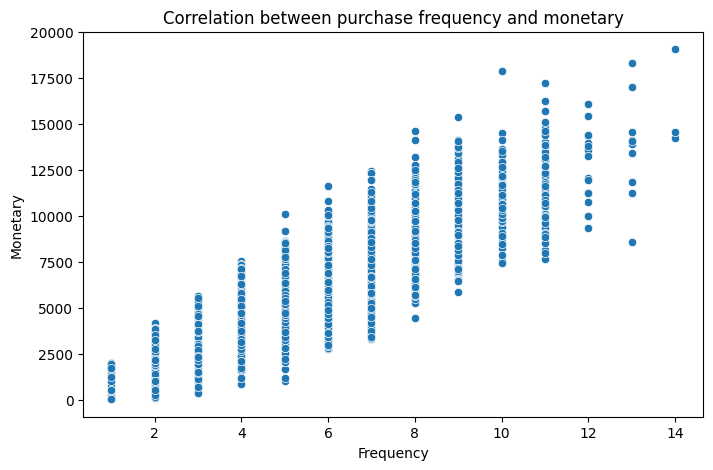

In [105]:
# Scatter Plot Frequency vs Monetary
plt.figure(figsize=(8,5))
sns.scatterplot(x=rfm['Frequency'], y=rfm['Monetary'])
plt.title('Correlation between purchase frequency and monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

## Histogram dan Boxplot RFM

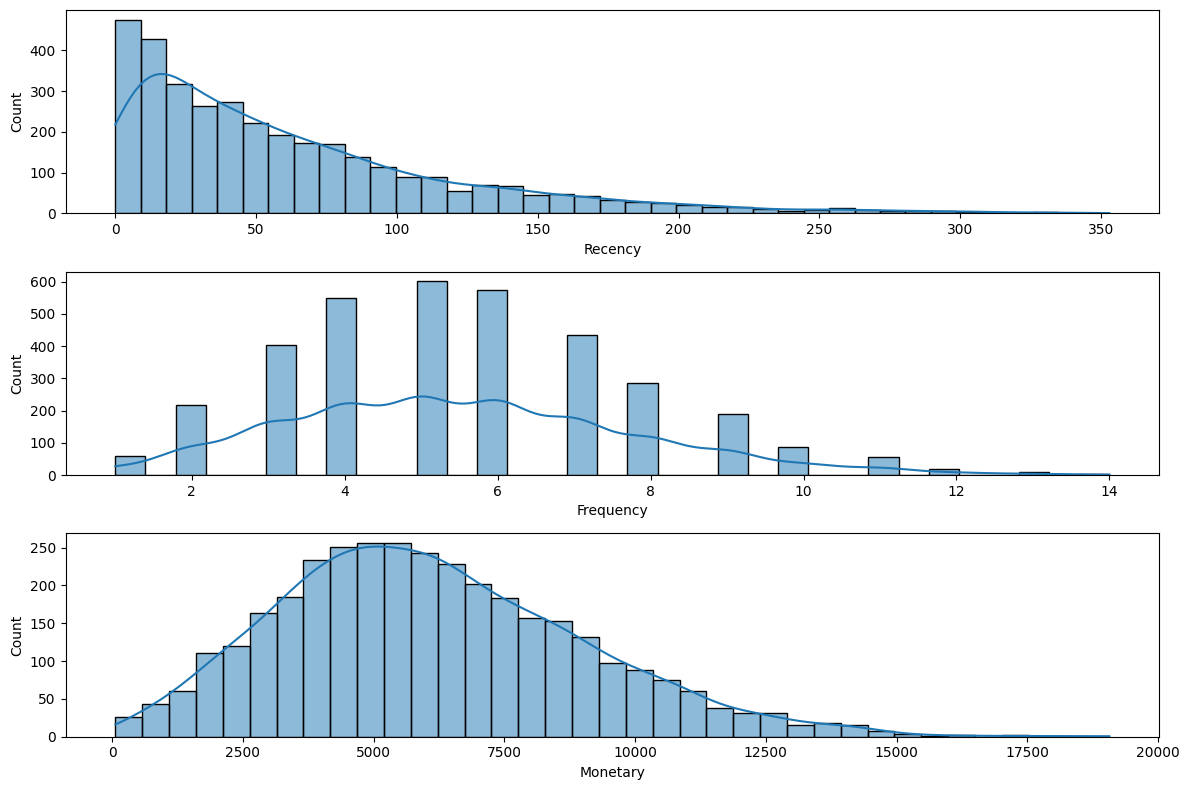

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.histplot(rfm['Recency'], kde=True)

plt.subplot(3,1,2)
sns.histplot(rfm['Frequency'], kde=True)

plt.subplot(3,1,3)
sns.histplot(rfm['Monetary'], kde=True)


plt.tight_layout()
plt.show()

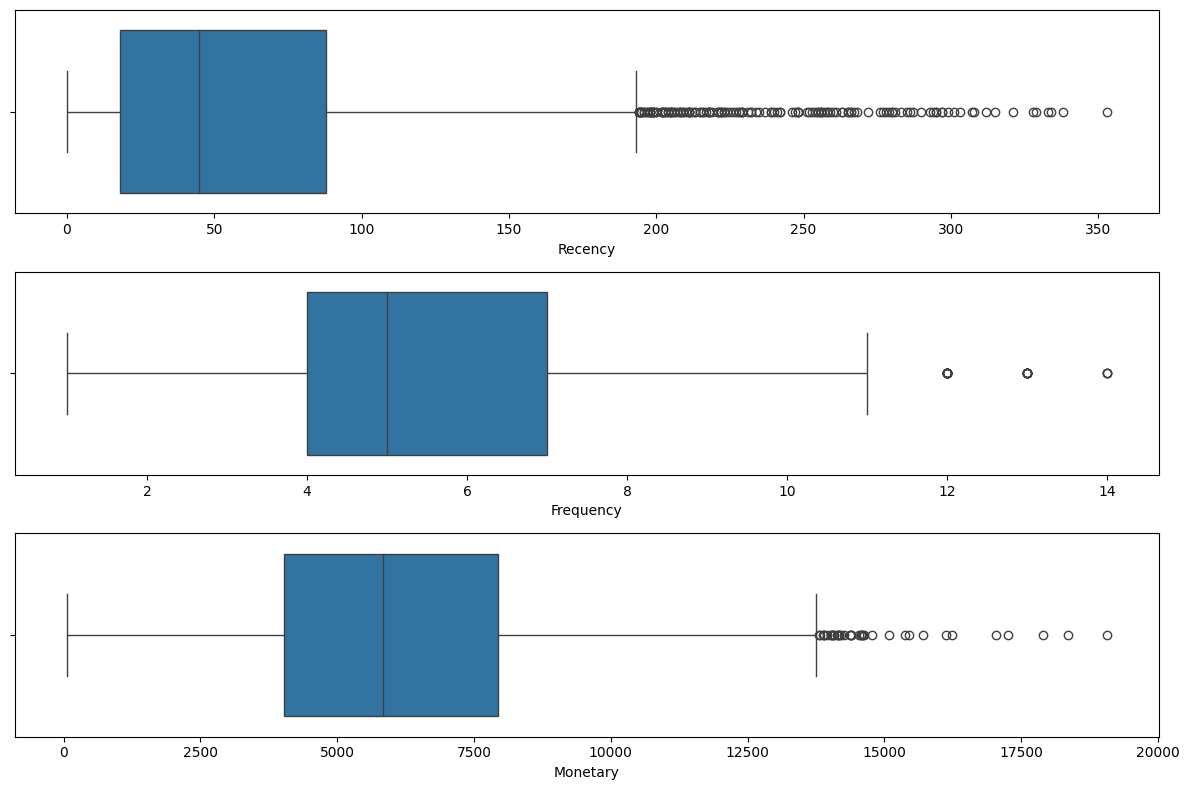

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))

plt.subplot(3,1,1)
sns.boxplot(x = rfm['Recency'])

plt.subplot(3,1,2)
sns.boxplot(x = rfm['Frequency'])

plt.subplot(3,1,3)
sns.boxplot(x = rfm['Monetary'])


plt.tight_layout()
plt.show()

- Recency
    - customer kita kebanyakan terakhir membeli sekitar 18-88 hari yang lalu (cukup baru)
- Frequency
    - customer kita kebanyakan baru 4 sampai 7 kali membeli
- Monetary
    - customer kita kebanyakan jumlah nominalnya tidak terlalu besar sekitar 4000 - 7900 dollar

In [108]:
# RFM Score

# mendefinisikan score dari statistika deskriptif nya
rfm.describe()

,CustomerID,Recency,Frequency,Monetary
count,3490.000000,3490.000000,3490.000000,3490.000000
mean,1750.092837,62.847564,5.522350,6113.584424
std,1011.348380,59.365082,2.275693,2898.017543
min,1.000000,0.000000,1.000000,60.340000
25%,876.250000,18.000000,4.000000,4023.002500
50%,1749.500000,45.000000,5.000000,5829.050000
75%,2622.750000,88.000000,7.000000,7934.462500
max,5034.000000,353.000000,14.000000,19071.320000


# Summary Statistics of RFM Variables

The abovr table presents the descriptive statistics for RFM variables in the dataset, based on 3,490 customers.

### **Key Insights:**
- **Recency:** The average recency is **62.85 days**, with a median of **45 days**, indicating that half of the customers made a purchase within the last **45 days**.
- **Frequency:** Customers made an average of **5.52 transactions**, with a maximum of **14** purchases.
- **Monetary:** The average total spending per customer is **$6,113.58**, while the top 25% of customers spent at least **$7,934.46**.

This data provides useful insights for segmenting customers based on their purchasing behavior.


# RFM Scoring System

The table below outlines the scoring criteria for **Recency (R), Frequency (F), and Monetary (M)** in RFM analysis. Higher scores indicate better customer engagement and value.

| **Metric**          | **Range / Criteria**       | **Score** | **Interpretation** |
|---------------------|--------------------------|-----------|--------------------|
| **Recency (Days)**  | ≤ 18                      | 4         | Very recent purchase (High engagement) |
|                     | 19 – 45                   | 3         | Moderately recent purchase |
|                     | 46 – 88                   | 2         | Less recent purchase |
|                     | > 88                      | 1         | Least recent purchase (Low engagement) |
| **Frequency (Purchases)** | ≤ 3               | 1         | Very low purchase frequency |
|                     | 4 – 5                     | 2         | Moderate purchase frequency |
|                     | 6 – 10                    | 3         | Frequent buyer |
|                     | > 10                      | 4         | Very frequent buyer (High engagement) |
| **Monetary (Spending)** | ≤ 4000               | 1         | Low spender |
|                     | 4001 – 5800               | 2         | Moderate spender |
|                     | 5801 – 7900               | 3         | High spender |
|                     | > 7900                    | 4         | Very high spender |

## **Key Insights**
- **Higher RFM scores** indicate more valuable and engaged customers.
- **Low Recency scores** suggest customers may need re-engagement strategies.
- **High Frequency and Monetary scores** highlight loyal and high-spending customers who are ideal for retention programs.


# Customer Segmentation Based on RFM Analysis

## **Segmentation Logic**
After calculating the **RFM scores**, customers are segmented manually using **if-else conditions** based on their **Recency (R_Score)** and combined **Frequency & Monetary scores (FM_Score)**.

### **Segmentation Criteria**
| **Segment**  | **Recency (R_Score)** | **FM_Score (F_Score + M_Score)** | **Description** |
|-------------|----------------------|--------------------------------|----------------|
| **VIP**     | ≥ 3                  | ≥ 3                            | High-value customers with frequent purchases and recent activity |
| **Loyal**   | ≥ 2                  | ≥ 2                            | Regular customers with consistent engagement |
| **General** | Otherwise            | Otherwise                      | Less engaged customers who require re-engagement strategies |

## **Implementation**
The segmentation function `segment_customer(row)` is applied to the dataset, categorizing each customer into one of the three groups: **VIP, Loyal, or General**.

## **Key Insights**
- **VIP customers** have both high **Recency** and **FM_Score**, making them the most valuable customers.
- **Loyal customers** are engaged but may not spend as much as VIPs.
- **General customers** may need **promotions or re-engagement strategies** to encourage repeat purchases.

This segmentation helps businesses tailor their marketing strategies, loyalty programs, and promotional efforts to different customer groups.


In [109]:
def rfm_score(baris):
    # recency
    if baris['Recency'] <= 18: #Q1
        r = 4
    elif baris['Recency'] <= 45: # Q2
        r = 3
    elif baris['Recency'] <= 88: # Q3
        r = 2
    else:
        r = 1

    # fequency
    if baris['Frequency'] <= 3: #Q1
        f = 1
    elif baris['Frequency'] <= 5: # Q2
        f = 2
    elif baris['Frequency'] <= 10: # Q3
        f = 3
    else:
        f = 4

    # monetary
    if baris['Monetary'] <= 4000: #Q1
        m = 1
    elif baris['Monetary'] <= 5800: # Q2
        m = 2
    elif baris['Monetary'] <= 7900: # Q3
        m = 3
    else:
        m = 4

    return pd.Series({'R_Score': r, 'F_Score': f, 'M_Score': m})

rfm[['R_Score', 'F_Score', 'M_Score']] = rfm.apply(rfm_score, axis=1)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,1,7,11,9084.45,4,4,4,12
1,2,128,3,4149.07,1,1,2,4
2,3,102,7,9525.22,1,3,4,8
3,4,195,2,1047.72,1,1,1,3
4,5,16,6,5903.20,4,3,3,10
...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4
3486,3498,127,6,5177.06,1,3,2,6
3487,3499,51,7,7673.48,2,3,3,8
3488,3500,144,6,4922.41,1,3,2,6


In [110]:
rfm['FM_Score'] = rfm['F_Score'] + rfm['M_Score']

# Manual Clustering using IF-ELSE Conditions
def segment_customer(row):
    recency = row['R_Score']
    fm_combined = row['FM_Score']

    if recency >= 3 and fm_combined >= 3:
        return 'VIP'
    elif recency >= 2 and fm_combined >= 2:
        return 'Loyal'
    else:
        return 'General'


# Apply the segmentation function
rfm['Customer_Segment'] = rfm.apply(segment_customer, axis=1)
rfm

,CustomerID,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,FM_Score,Customer_Segment
0,1,7,11,9084.45,4,4,4,12,8,VIP
1,2,128,3,4149.07,1,1,2,4,3,General
2,3,102,7,9525.22,1,3,4,8,7,General
3,4,195,2,1047.72,1,1,1,3,2,General
4,5,16,6,5903.20,4,3,3,10,6,VIP
...,...,...,...,...,...,...,...,...,...,...
3485,3497,52,3,3744.07,2,1,1,4,2,Loyal
3486,3498,127,6,5177.06,1,3,2,6,5,General
3487,3499,51,7,7673.48,2,3,3,8,6,Loyal
3488,3500,144,6,4922.41,1,3,2,6,5,General


In [118]:
# Total number of customers in each segment

Segmentation = rfm['Customer_Segment'].value_counts().rename('Jumlah')

Segmentation

Customer_Segment
VIP        1598
Loyal      1023
General     869
Name: Jumlah, dtype: int64

## Marketing Budget Efficiency Based on Customer Segmentation: VIP, Loyal, and General.

Based on the analysis, the segmented customers are categorized into three groups. Each segment requires a tailored marketing approach to optimize budget efficiency and maximize customer value.

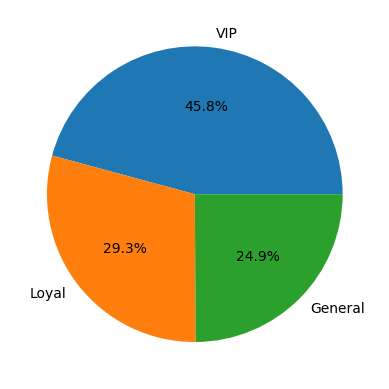

In [112]:
plt.pie(rfm['Customer_Segment'].value_counts(), labels=rfm['Customer_Segment'].value_counts().index, autopct='%1.1f%%')
plt.show()

In [113]:
# Visualization using Plotly in 3D

import plotly as py
import plotly.graph_objs as go

# Create a color mapping for each customer segment.
color_map = {
    'VIP': 'blue',
    'Loyal': 'green',
    'General': 'black'
}

# Change the marker color using mapping.
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['R_Score'],
    y=rfm['F_Score'],
    z=rfm['M_Score'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Use colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

In [114]:
# Visualization using Plotly in 3D

import plotly as py
import plotly.graph_objs as go

# Create a color mapping for each customer segment.
color_map = {
    'VIP': 'blue',
    'Loyal': 'green',
    'General': 'black'
}

# Change the marker color using mapping.
colors = [color_map[segment] for segment in rfm['Customer_Segment']]

trace1_non_ml = go.Scatter3d(
    x=rfm['Recency'],
    y=rfm['Frequency'],
    z=rfm['Monetary'],
    mode='markers',
    marker=dict(color=colors, size=5, opacity=0.8)  # Use colors
)

dataa1_non_ml = [trace1_non_ml]

layout1_non_ml = go.Layout(
    title='Cluster',
    scene=dict(
        xaxis=dict(title='Recency'),
        yaxis=dict(title='Frequency'),
        zaxis=dict(title='Monetary')
    )
)

fig1_non_ml = go.Figure(data=dataa1_non_ml, layout=layout1_non_ml)
py.offline.iplot(fig1_non_ml)

Without segmentation, all customers would be treated equally, leading to higher marketing costs. Let's assume X represents the marketing budget per customer. In this case, the total marketing budget would be calculated as:

In [119]:
(Segmentation['VIP'] + Segmentation['Loyal'] + Segmentation['VIP']) * 1.25

# This approach results in overspending on low-value customers, reducing overall efficiency.

np.float64(5273.75)

However, with segmentation, the marketing budget is distributed strategically based on each group's potential contribution. We can use this tailored approach as follows:

In [116]:
(Segmentation['VIP'] + (Segmentation['Loyal'] + Segmentation['VIP']) * 1.25)

np.float64(4874.25)

By adjusting marketing efforts based on customer value, segmentation leads to a 7.58% reduction in total marketing costs. This ensures that resources are allocated efficiently, maximizing return on investment (ROI) while improving customer retention and revenue growth.

In [117]:
(5273.75 - 4874.25)/5273.75 * 100

7.575254799715572